In [1]:
from module_imports import *
from download_data import *
from import_data import *
from larochelle_nn import *

%matplotlib inline

download_goog()

stock_df, prediction_df = pd.DataFrame(), pd.DataFrame()
pred_tickers = []
source = "G"
binarize = True
gt = 1.0
lt = 50.0
vol = 10000
if source == "Q":
    stock_df, prediction_df, pred_tickers = get_quandl_data(binarize=True, gt=gt, lt=lt, vol=vol)
elif source == "G":
    stock_df, prediction_df, pred_tickers = get_goog_data(binarize=True, gt=gt, lt=lt, vol=vol)
    
Y = stock_df['label'].values
Y = Y.reshape(Y.shape[0], 1)

X_df = stock_df.drop(['label','date', 'ticker'], axis=1)
X = X_df.values

print X.shape, Y.shape
X_df.tail()

2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
problem with IMRS
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
2015-06-19
201

10.0-CLOSE  10.0-HIGH  10.0-LOW  10.0-OPEN  10.0-VOLUME  10.0-op_cl%  \
0      6.7900     6.9600    6.7800      6.960        10002    -0.024425   
0      6.6500     6.6800    6.4600      6.680        15827    -0.004491   
0      5.8884     6.3120    5.6300      6.312        73120    -0.067110   
0      6.2700     6.4185    6.2236      6.400        15617    -0.020313   
0      6.0700     6.2800    6.0000      6.280        23858    -0.033439   

   10.0-lo_hi%  10.3-CLOSE  10.3-HIGH  10.3-LOW    ...     15.0-op_cl%  \
0     0.026549       6.681     6.8300    6.6000    ...       -0.006039   
0     0.034056       6.730     6.9396    6.7001    ...       -0.030928   
0     0.121137       6.300     6.3000    5.8600    ...        0.009724   
0     0.031316       6.210     6.2700    6.2000    ...        0.003145   
0     0.046667       6.024     6.0500    5.9000    ...        0.008224   

   15.0-lo_hi%  15.3-CLOSE  15.3-HIGH  15.3-LOW  15.3-OPEN  15.3-VOLUME  \
0     0.008156        6.62      6.690    6.5600       6.58        13700   
0     0.039802        6.55      6.576    6.5500       6.57         5300   
0     0.019640        6.26      6.275    6.2186       6.23        11000   
0     0.009479        6.29      6.410    6.2700       6.41         3500   
0     0.011102        6.17      6.300    6.1500       6.16        15500   

   15.3-op_cl%  15.3-lo_hi%  week_day  
0     0.006079     0.019817         3  
0    -0.003044     0.003969         4  
0     0.004815     0.009070         0  
0    -0.018721     0.022329         1  
0     0.001623     0.024390         2  

[5 rows x 85 columns]

In [4]:
skb = SelectKBest(k=30)
skb = skb.fit(X,Y.ravel())
for i in xrange(X_df.columns.shape[0]):
    if skb.scores_[i] > 1.0:
        print X_df.columns[i], skb.scores_[i]
        
X = skb.transform(X)

10.0-CLOSE 4.14030418833
10.0-HIGH 3.94696931071
10.0-LOW 4.21351470439
10.0-OPEN 4.05164265367
10.0-VOLUME 3.99899339936
10.0-op_cl% 1.17316857435
10.0-lo_hi% 12.564051442
10.3-CLOSE 4.22303676858
10.3-HIGH 4.07954871791
10.3-LOW 4.16967870111
10.3-OPEN 4.12983507587
10.3-VOLUME 6.75767776182
10.3-op_cl% 1.61056376427
10.3-lo_hi% 10.3572167792
11.0-CLOSE 4.20476889552
11.0-HIGH 4.19124200676
11.0-LOW 4.22474911545
11.0-OPEN 4.21645205274
11.0-VOLUME 5.30216274178
11.0-lo_hi% 3.55294246526
11.3-CLOSE 4.20394829866
11.3-HIGH 4.21126723463
11.3-LOW 4.30260328857
11.3-OPEN 4.23403337272
11.3-VOLUME 6.69008085979
11.3-lo_hi% 8.43431051275
12.0-CLOSE 4.04919117493
12.0-HIGH 4.10859055751
12.0-LOW 4.19253812578
12.0-OPEN 4.19398324685
12.0-VOLUME 1.44531965089
12.0-op_cl% 5.04533155935
12.0-lo_hi% 6.35166469093
12.3-CLOSE 4.10501513474
12.3-HIGH 4.04533928765
12.3-LOW 4.13187033236
12.3-OPEN 4.05624713365
12.3-VOLUME 2.96966099977
12.3-op_cl% 3.34074895376
12.3-lo_hi% 5.82663690961
13.0-CLOS

In [5]:
balance_labeled_data = False
if balance_labeled_data == True:
    # randomly balance labeled data
    indices_Y_is_0 = np.where(Y == 0)[0]
    print indices_Y_is_0.shape[0]
    indices_Y_is_1 = np.where(Y == 1)[0]
    print indices_Y_is_1.shape[0]

    subset_indices_Y_is_0 = np.random.choice(indices_Y_is_0, indices_Y_is_1.shape[0])
    X_is_0 = X[subset_indices_Y_is_0]
    Y_is_0 = Y[subset_indices_Y_is_0]
    X_is_1 = X[indices_Y_is_1]
    Y_is_1 = Y[indices_Y_is_1]

    X = np.concatenate((X_is_0,X_is_1))
    Y = np.concatenate((Y_is_0,Y_is_1))

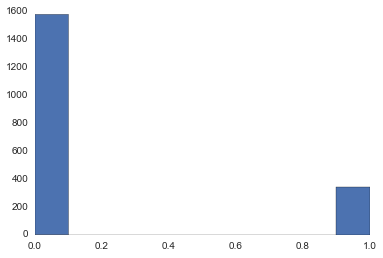

In [6]:
plt.hist(Y)
plt.show()

In [7]:
vectorize_label = True
if vectorize_label == True:
    new_y = []
    positives = []
    for i in xrange(Y.shape[0]):
        if Y[i] == 0:
            new_y.append(np.array([[1],[0]]))
        elif Y[i] == 1:
            new_y.append(np.array([[0],[1]]))
    Y = new_y

In [8]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.30, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_vt, y_vt, test_size=0.50, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
#for x,y in zip(X_train, y_train):
#    print x.reshape(x.shape[0],1)
#    print y.reshape(y.shape[0],1)
#    break

---

In [11]:
hs = [1, 2, 5, 10, 15, 50, 100]

epochs = 100
Lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
Regs = ['L2', 'L1']
alphas = [0.0001, 0.001, 0.01, 0.1]

# GRID SEARCH
#for h in hs:
#    for Lambda in Lambdas:
#        for Reg in Regs:
#            for alpha in alphas:
#                NN_SGD(source, binarize, gt, lt, vol, balance_labeled_data, scaler, X_train, y_train, X_validation, y_validation, h, h, epochs, Lambda, Reg, alpha, plot=False)

# RANDOM SEARCH
for i in xrange(10):
    h = np.random.choice(hs)
    NN_SGD(source, binarize, gt, lt, vol, balance_labeled_data, scaler, X_train, y_train, X_validation, y_validation, h, h, epochs, np.random.choice(Lambdas), np.random.choice(Regs), np.random.choice(alphas), plot=False)

---

In [12]:
### COMBINE GOOG AND QUANDL -> get yesterday's data and today's data (inlcuding roll avg)